## S&P 500 ETF (SPY)
SPY market data obtained from Yahoo finance

Daily prices from 1/29/1993 - 4/23/2021

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

%matplotlib inline

In [2]:
# Read SPY data
df = pd.read_csv("./SPY.csv")
df.head()

# Questions:
# Should we use the close price, or adjusted close price for our analysis
# https://www.investopedia.com/terms/a/adjusted_closing_price.asp

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.884184,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.068277,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.123499,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.399649,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.510111,531500


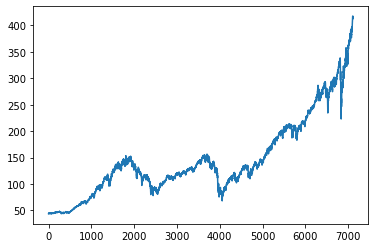

In [3]:
plt.plot(df["Close"])

In [4]:
# Calculate log returns of Close price
log_returns = np.log(df["Close"]) - np.log(df["Close"].shift(1))
log_returns = log_returns[log_returns.notnull()] # Remove the Null at index 0

# Calculate statistics to generate true normal distribution
mu, sigma = norm.fit(log_returns)


# print("observed mu:", mu)
# print("observed sigma:", sigma)

## Compare to Normal distribution

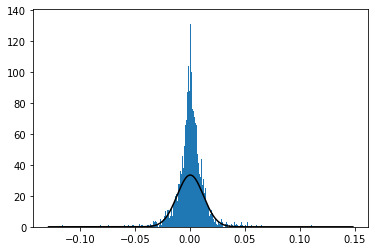

In [9]:
# Plot histogram of observed log returns
plt.hist(log_returns, bins = 1000);
xmin, xmax = plt.xlim()
# CL: This plot looks fairly normal to me. I was expecting to see fat tails or other skews.

# Plot normal distribution over histogram of observed log returns
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k')

## Daily volatility over time

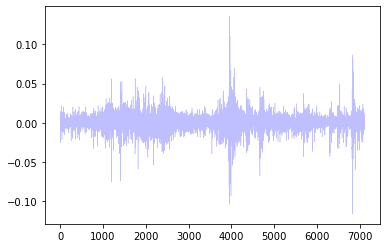

In [26]:
plt.plot(
    np.arange(0, len(np.diff(np.log(df["Close"]))), step=1),
    np.diff(np.log(df["Close"])),
    'k', 
    color = "blue",
    linewidth = 0.5,
    alpha = 0.25
)